# Linear models

linear relationship between dependent and independent var

inc/dec in one var leads to inc/dec in other

heigh vs weight
size of land vs price


Low MSE = better model
y = mx + c, m = slope, c = intercept

but how to find m, c ?


In [1]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

In [2]:
#creating a sample data

experience = [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
salary =     [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2]

data = pd.DataFrame({ 'salary' : salary, 'experience' :experience })
data.shape

(12, 2)

In [3]:
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


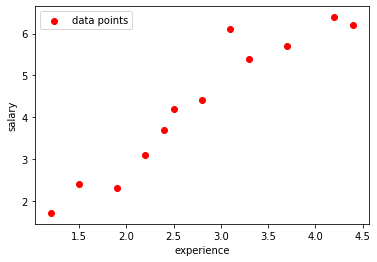

In [5]:
#plotting the data

plt.scatter(data.experience, data.salary, color ='red', label= 'data points')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

# Cost function

2.69665


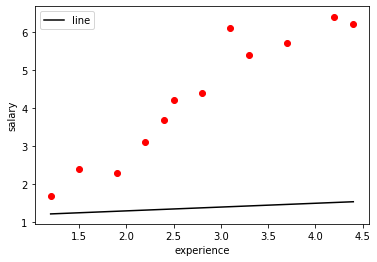

In [13]:
# trying to plot one line ,lets keep slope and intercept constant

m = 0.1
c = 1.1

line1 = []

for i in range(len(data)):
    line1.append(data.experience[i] * m + c)

plt.scatter(data.experience, data.salary, color ='red')
plt.plot(data.experience, line1, color ='black', label= 'line')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

MSE = mse(data.experience, line1)
print(MSE)

In [20]:

def Error(m, data):
    c = 1.1
    salary = []
    for i in range(len(data.experience)):
        y = data.experience[i] * m + c
        salary.append(y)
    MSE = mse(data.experience, salary)
    return MSE

In [21]:
slope = [i/100 for i in range(0, 150)]
test_mse = []

for i in slope:
    temp= Error(m = i, data = data)
    test_mse.append(temp)

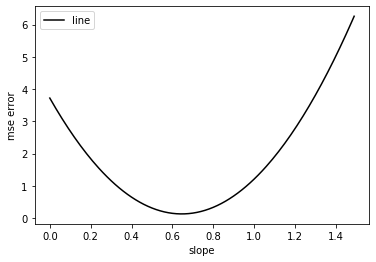

In [25]:
#plotting the mse agansit the slope values,by putting the intercet as constant
plt.plot(slope, test_mse, color ='black', label= 'line')
plt.xlabel('slope')
plt.ylabel('mse error')
plt.legend()

# Gradient descent in linear reg

Optimisation tech

minimises error generated

works iteratively

cal error at each iteration

optimizes model parameters

Until the model converges to mim cost

steps:
Initialize the parameters
Generate predictions
Calculate cost Randomly
Update parameters
Repeat the above steps until convergence


how to fnd the global minima
    random initialization
    adjust the learning rate (where it avoids local minima)
    
    
### Assumptions

Linear relationships:

  if not linear we cant use, so we trnsform them
  
no correlation of error terms:

   (correlated, change in one var impat other var)
   
constant variance of error terms:

   trend in the variance

no correlation among independent var:
    
   we eliminate the term ; VIF = 1/( 1- R^2)
   VIF helps us addressing multicolinearity

errors normally distributed: 

   standard  qq chart, normally distributed = no outliers

# Linear regression


In [26]:
#importing the lib

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#importing the data
#we are using the bigmart sales dataset
df = pd.read_csv('data_knn_regression_cleaned_bigmart_sales.csv')
df.shape

(8523, 46)

In [31]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [33]:
#checking for null values

df.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

In [110]:
#checking the datatypes
df.dtypes
#all categorical var are converted into numeric =encoding

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [38]:
# seperating independent and dependent var

x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [40]:
#splitting the data into test and train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state=56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [44]:
#implementing the linear regression

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [45]:
#creating instance of linear regression

lr = LR()
#fit the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#prediction oveer the train set and cal the error

train_predict = lr.predict(x_train)
k = mae(train_predict, y_train)
print('error wrt train set: ',k)

error wrt train set:  821.4206146753693


In [48]:
#prediction over the test set

test_predict = lr.predict(x_test)
k = mae(test_predict, y_test)
print('error wrt test set: ',k)

error wrt test set:  875.268898298526


In [51]:
# check at the coefficents

lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0.5, 1.0, 'Coefficients plot')

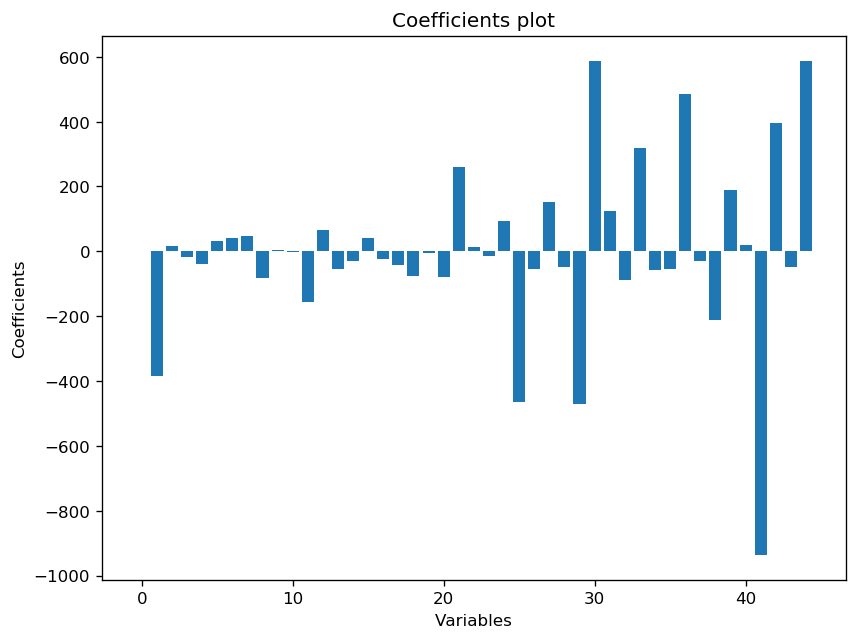

In [56]:
#plotting the coefficients

plt.figure(figsize =(8, 6), dpi = 120, facecolor = 'w', edgecolor = 'b' )
x = range(len(x_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients plot')

'''
here we can see that the model depends upon independent variables
too much, but these coeff are  not suitable for interpretation because
these are not scaled
'''

# checking assumptions of linear model

In [59]:
#arranging ans cal the residuals

residuals = pd.DataFrame({'fitted_values': y_test, 'predicted_values': test_predict})
residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.shape

(2131, 3)

Text(0.5, 1.0, 'Residuals points')

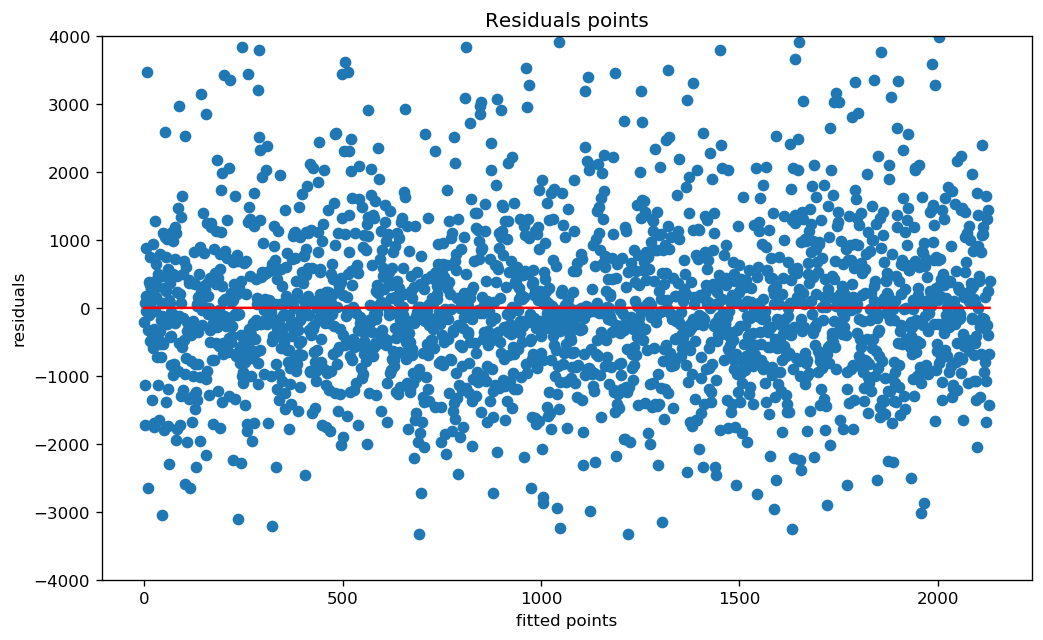

In [77]:
#plotting the residual curve( is there  constant var or homoscedastic)

plt.figure(figsize =(10,6), dpi=120, facecolor='w',edgecolor='b')
f = range(0,2131)
k = [0 for i in range(0, 2131)]
plt.scatter(f, residuals.residuals[:], label='residuals')
plt.plot(f, k, color = 'red', label = 'regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.ylim(-4000, 4000)
plt.title('Residuals points')

'''
Residual plot looks Homoscedastic , i.e; the variance of the 
error across the data is nearly constant
'''

# checking distribution of residuals


If residuals are not normally distributed it implies that the model varies in accuracy for different values of the predictor variable. This suggests that the relationship between predictor and outcome may not be linear and undermines a key assumption of the model.

'\naccording to histogram , the distribution \n'

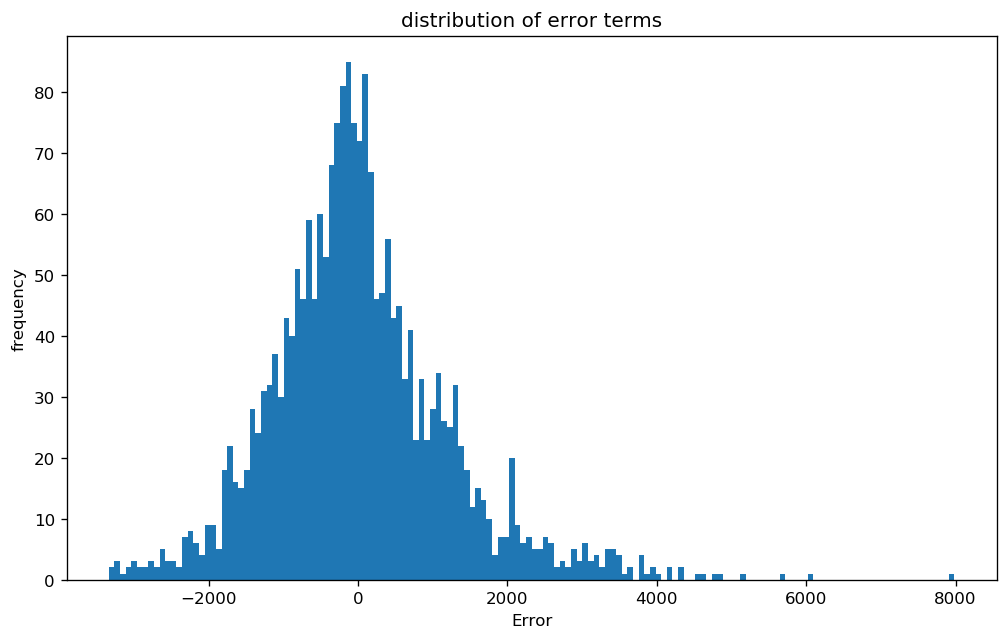

In [83]:
#histogram for distribution 

plt.figure(figsize=(10,6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals[:], bins = 150)
plt.xlabel('Error')
plt.ylabel('frequency')
plt.title('distribution of error terms')

'''
according to histogram , the distribution of error in nearly
normal, but there are some outliers on the higher end of the errors
'''

# QQ plot 
  is data normally distributed ?

Text(0.5, 1.0, 'Checcking distributions of Residual Errors')

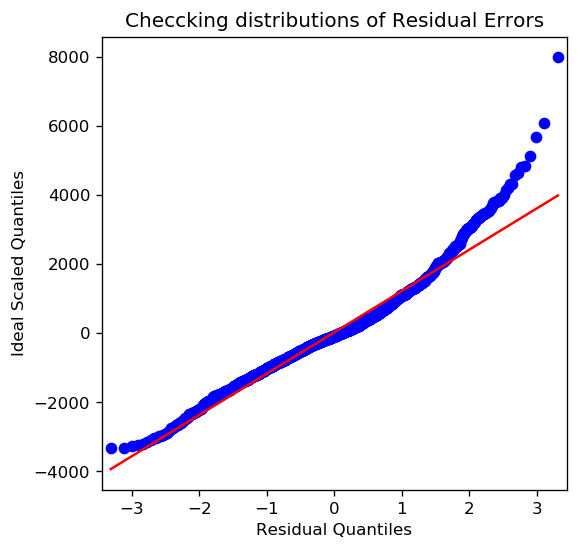

In [89]:
#importing the QQ plot from the statsmodels

from statsmodels.graphics.gofplots import qqplot

#plotting the QQ plot

fig, ax = plt.subplots(figsize=(5, 5), dpi = 120)
qqplot(residuals.residuals[:], line ='s', ax =ax)
plt.xlabel('Residual Quantiles')
plt.ylabel('Ideal Scaled Quantiles')
plt.title('Checcking distributions of Residual Errors')

'''
QQ plot clearly verifies our findings from the histogram of
the residuals, the data is mostly normal in nature, but there 
are some outliers on the higher end of the residuals

from the ACF plot, we can easily see that there is almost 
negligible correlation between the error terms.
hence there is no automatation present in the data

'''

# Variance Inflation Factor (VIF)
   checking for multi collinearity

In [96]:
# importing variance_inflation_factor function from the statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#cal VIF for every col( only works for the not categorical  var)

VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(data.shape[1])], index = data.columns)


'''
from this list , we clearly see that there happens to be no 
independent variables over the value of 5, which means that there are 
no features that exhibit the Multicollinearity in the dataset
these VIF works only for the continuous var
'''
VIF

salary        2.349925
experience    1.101456
dtype: float64

# Model Interoperability

   so far we have simply been predicting the values using the linear regression , but in order to interoret the model,
the normalising of the data is essential 

In [97]:
# creating instance of linear regression

lr = LR(normalize = True)

#fitting the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [98]:
#prediction oveer the train set and cal the error

train_predict = lr.predict(x_train)
k = mae(train_predict, y_train)
print('error wrt train set: ',k)

error wrt train set:  822.5183026282853


In [99]:
#prediction over the test set

test_predict = lr.predict(x_test)
k = mae(test_predict, y_test)
print('error wrt test set: ',k)

error wrt test set:  876.191747536368


In [101]:
# check at the coefficents

lr.coef_

array([ 5.01857067e-01, -1.47418214e+02,  1.55337914e+01,  9.63047812e+13,
       -7.98931828e+14, -7.98931828e+14, -7.98931828e+14, -7.98931828e+14,
       -7.98931828e+14,  3.66622651e+16,  3.66622651e+16,  3.66622651e+16,
        3.66622651e+16,  3.66622651e+16,  3.66622651e+16,  3.66622651e+16,
        3.66622651e+16,  3.66622651e+16,  3.66622651e+16,  3.66622651e+16,
        3.66622651e+16,  3.66622651e+16,  3.66622651e+16,  3.66622651e+16,
        3.66622651e+16,  4.25944161e+16,  7.11340147e+15,  1.24744618e+16,
        9.00114012e+16, -1.57097336e+16,  1.11397806e+16, -1.32785234e+16,
        1.29559857e+16,  1.35865106e+15,  5.29187654e+16,  5.47644092e+16,
       -2.57108243e+16,  2.60418995e+16,  1.70027481e+16,  3.09657891e+16,
       -1.65114642e+16, -1.10533521e+16, -2.92773941e+16, -3.38188655e+16,
        4.73640699e+16])

Text(0.5, 1.0, 'Normalised Coefficients plot')

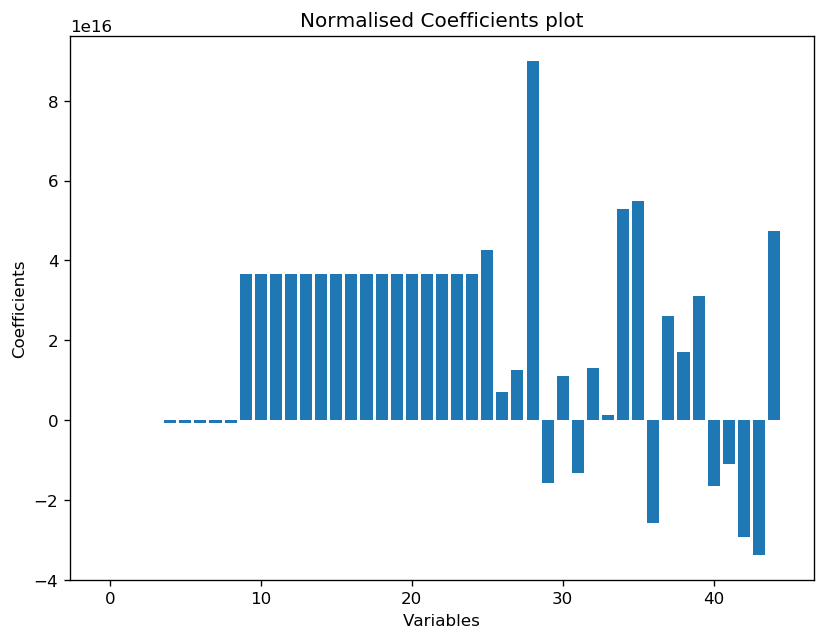

In [105]:
#plotting the coefficients

plt.figure(figsize =(8, 6), dpi = 120, facecolor = 'w', edgecolor = 'b' )
x = range(len(x_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalised Coefficients plot')

'''
noe the coefficients we see are nomarlised  and we 
can easily make final inferences out of it

here we can see that there are lot of coefficients which are 
near to zero and not significant. 
so lets us tryremoving them and build th model again
'''

# Creating new subsets of data

In [106]:
# seperating independent and dependent var

x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [107]:
#arranging coeff with features

Coefficients = pd.DataFrame({'Variable': x.columns,'coefficient': lr.coef_})
Coefficients.shape

(45, 2)

In [111]:
Coefficients.head()

,Variable,coefficient
0,Item_Weight,5.018571e-01
1,Item_Visibility,-1.474182e+02
2,Item_MRP,1.553379e+01
3,Outlet_Establishment_Year,9.630478e+13
4,Item_Fat_Content_LF,-7.989318e+14


In [113]:
#choosing var with significance greater than 0.5 (filtering significant feature)

sig_var = Coefficients[Coefficients.coefficient > 0.5]
sig_var

,Variable,coefficient
0,Item_Weight,5.018571e-01
2,Item_MRP,1.553379e+01
3,Outlet_Establishment_Year,9.630478e+13
9,Item_Type_Baking Goods,3.666227e+16
10,Item_Type_Breads,3.666227e+16
11,Item_Type_Breakfast,3.666227e+16
12,Item_Type_Canned,3.666227e+16
13,Item_Type_Dairy,3.666227e+16
14,Item_Type_Frozen Foods,3.666227e+16
15,Item_Type_Fruits and Vegetables,3.666227e+16


In [117]:
#extracting the significant subset to independent var

subset = data[sig_var['Variable'].value]
subset.head()

AttributeError: 'Series' object has no attribute 'value'

In [118]:
#splitting the data into test and train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state=56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [119]:
#implementing the linear regression

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [120]:
#creating instance of linear regression

lr = LR()
#fit the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
#prediction oveer the train set and cal the error

train_predict = lr.predict(x_train)
k = mae(train_predict, y_train)
print('error wrt train set: ',k)

error wrt train set:  821.4206146753693


In [122]:
#prediction over the test set

test_predict = lr.predict(x_test)
k = mae(test_predict, y_test)
print('error wrt test set: ',k)

error wrt test set:  875.268898298526


In [123]:
# check at the coefficents

lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0.5, 1.0, 'Coefficients plot')

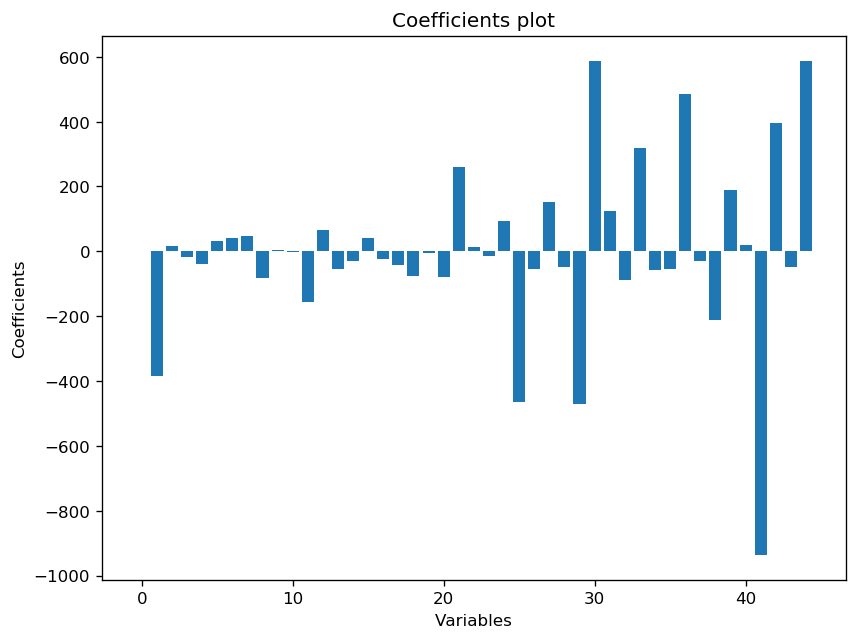

In [124]:
#plotting the coefficients

plt.figure(figsize =(8, 6), dpi = 120, facecolor = 'w', edgecolor = 'b' )
x = range(len(x_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients plot')